In [ ]:
import pandas as pd # Pandas: Para manipulação e análise de dados.
import numpy as np # NumPy: Para computação numérica.
# train_test_split: Para dividir dados em conjuntos de treino e teste.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Para criar modelos de regressão linear.
import seaborn as sns # Seaborn: Para visualizações estatísticas.
import matplotlib.pyplot as plt # Matplotlib: Para criar visualizações estáticas e interativas.
import plotly.express as px # Plotly: Para visualizações interativas.
import statsmodels.api as sm # Statsmodels: Para modelagem estatística e econometria.




In [ ]:
#leitura de cada dataset
df1 = pd.read_csv('olist_customers_dataset.csv')
df2 = pd.read_csv('olist_orders_dataset.csv')
df3 = pd.read_csv('olist_order_items_dataset.csv')
df4 = pd.read_csv('olist_sellers_dataset.csv')
df5 = pd.read_csv('olist_order_reviews_dataset.csv')
df6 = pd.read_csv('olist_order_payments_dataset.csv')
df7 = pd.read_csv('olist_products_dataset.csv')

In [ ]:
#criação de um Dataframe, juntando todos os datasets
merged_df = pd.merge(df1, df2, on='customer_id', how='inner')
merged_df = pd.merge(merged_df, df3, on='order_id', how='inner')
merged_df = pd.merge(merged_df, df4, on='seller_id', how='inner')
merged_df = pd.merge(merged_df, df5, on='order_id', how='inner')
merged_df = pd.merge(merged_df, df6, on='order_id', how='inner')
merged_df = pd.merge(merged_df, df7, on='product_id', how='inner')
merged_df #print do dataframe

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2,146.87,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,8,335.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7,157.73,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,173.30,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8,252.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,6,88.78,livros_interesse_geral,51.0,489.0,2.0,611.0,22.0,22.0,23.0
117325,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,3,129.06,esporte_lazer,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0
117326,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,5,56.04,beleza_saude,60.0,575.0,1.0,870.0,25.0,20.0,18.0
117327,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2,711.07,relogios_presentes,59.0,452.0,1.0,710.0,19.0,13.0,14.0


In [ ]:
# Remove todas as linhas do DataFrame 'merged_df' que contêm pelo menos um valor nulo.
# A modificação é feita diretamente no DataFrame original devido ao argumento 'inplace=True'.
# O valor retornado por 'dropna' (None, nesse caso) é armazenado na variável 'soma', sobrescrevendo o valor anterior.
nulo = merged_df.dropna(inplace=True)
print(nulo)


None


# Analise de receita



In [93]:
#converte a coluna em datetime do próprio pandas, facilitando manipulação
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

#cria uma coluna somente com o ano da compra
merged_df['ano_compra'] = merged_df['order_purchase_timestamp'].dt.year

# Agrupa o DataFrame 'merged_df' por 'product_category_name' e 'ano_compra',
# calcula a soma dos preços ('price') para cada grupo e redefine o índice do DataFrame resultante.
vendas_por_categoria = merged_df.groupby(['product_category_name', 'ano_compra'])['price'].sum().reset_index()

# Adiciona a coluna 'contagem_pedidos' ao DataFrame 'vendas_por_categoria',
# contendo a quantidade de pedidos para cada grupo (categoria e ano).
vendas_por_categoria['contagem_pedidos'] = merged_df.groupby(['product_category_name', 'ano_compra'])['order_id'].count().values

# Adiciona a coluna 'media_review' ao DataFrame 'vendas_por_categoria',
# contendo a média das avaliações ('review_score') para cada grupo (categoria e ano).
vendas_por_categoria['media_review'] = merged_df.groupby(['product_category_name', 'ano_compra'])['review_score'].mean().values

#renomeia coluna de 'price' para 'receita'
vendas_por_categoria = vendas_por_categoria.rename(columns={'price': 'receita'})

vendas_por_categoria #print dataframe

,product_category_name,ano_compra,receita,contagem_pedidos,media_review
0,agro_industria_e_comercio,2018,4258.94,15,3.600000
1,alimentos,2018,3305.72,64,4.046875
2,alimentos_bebidas,2018,1462.01,18,4.222222
3,artes,2017,299.99,1,1.000000
4,artes,2018,4207.46,50,3.700000
...,...,...,...,...,...
68,sinalizacao_e_seguranca,2018,6400.06,42,3.738095
69,tablets_impressao_imagem,2018,49.90,1,5.000000
70,telefonia,2018,44961.70,440,3.731818
71,telefonia_fixa,2018,10434.88,17,3.352941


In [94]:
# Importa a classe LabelEncoder do módulo sklearn.preprocessing.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()# Cria uma instância da classe LabelEncoder.

# Aplica o LabelEncoder para transformar a coluna 'product_category_name' em valores numéricos.
# A coluna 'product_category_name_encoded' é criada para armazenar os valores codificados.
vendas_por_categoria['product_category_name_encoded'] = le.fit_transform(vendas_por_categoria['product_category_name'])

In [95]:
vendas_por_categoria

,product_category_name,ano_compra,receita,contagem_pedidos,media_review,product_category_name_encoded
0,agro_industria_e_comercio,2018,4258.94,15,3.600000,0
1,alimentos,2018,3305.72,64,4.046875,1
2,alimentos_bebidas,2018,1462.01,18,4.222222,2
3,artes,2017,299.99,1,1.000000,3
4,artes,2018,4207.46,50,3.700000,3
...,...,...,...,...,...,...
68,sinalizacao_e_seguranca,2018,6400.06,42,3.738095,62
69,tablets_impressao_imagem,2018,49.90,1,5.000000,63
70,telefonia,2018,44961.70,440,3.731818,64
71,telefonia_fixa,2018,10434.88,17,3.352941,65


In [96]:
# Seleciona apenas as colunas numéricas do DataFrame 'vendas_por_categoria' e cria um novo DataFrame chamado 'df'.
df = vendas_por_categoria.select_dtypes(include=np.number)

# Calcula a matriz de correlação entre as colunas do DataFrame 'df' e a armazena na variável 'corre'.
corre = df.corr()

# Seleciona a coluna 'receita' da matriz de correlação 'corre' para visualizar a correlação entre a receita e as outras variáveis numéricas.
corre['receita']

,receita
ano_compra,0.176353
receita,1.000000
contagem_pedidos,0.948389
media_review,-0.018626
product_category_name_encoded,0.108526


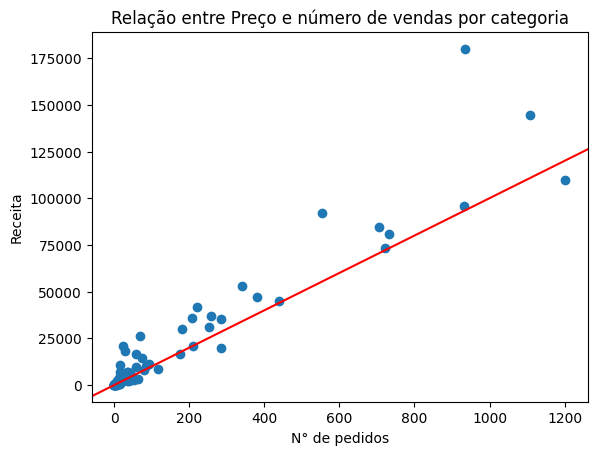

In [97]:
# Cria um gráfico de dispersão (scatter plot) com 'contagem_pedidos' no eixo x e 'receita' no eixo y.
plt.scatter(vendas_por_categoria['contagem_pedidos'], vendas_por_categoria['receita'])
# Adiciona uma linha reta ao gráfico, com pontos inicial (1, 10) e final (900, 90000), na cor vermelha.
plt.axline(xy1 = (1, 10),xy2 = (900, 90000), color = "red" )
# Define o título do gráfico
plt.title("Relação entre Preço e número de vendas por categoria")
# Define o título do gráfico
plt.xlabel("N° de pedidos")
# Define o rótulo do eixo y
plt.ylabel("Receita")
plt.show() #print do gráfico

In [98]:
# Define a variável 'y' como a coluna 'receita' do DataFrame 'vendas_por_categoria'.
# Essa será a variável dependente (alvo) na modelagem.
y = vendas_por_categoria['receita']

# Define a variável 'X' como o DataFrame 'vendas_por_categoria' sem a coluna 'receita'.
# Essas serão as variáveis independentes (preditoras) na modelagem.
X = vendas_por_categoria.drop(columns = 'receita')

In [99]:
# Divide os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 230)

In [100]:
# adicionando o constante
X_train = sm.add_constant(X_train)

In [101]:
# Cria um novo DataFrame chamado 'df_train' a partir dos dados em 'X_train'.
df_train = pd.DataFrame(data= X_train )

# Adiciona a coluna 'receita' ao DataFrame 'df_train', usando os dados de 'y_train'.
df_train['receita'] = y_train

In [102]:
#excluir coluna
X_train.drop(columns='product_category_name', inplace=True)


In [103]:
X_train #printar dataframe

,const,ano_compra,contagem_pedidos,media_review,product_category_name_encoded
50,1.0,2018,46,4.086957,45
35,1.0,2017,6,3.666667,32
40,1.0,2018,8,4.750000,36
7,1.0,2018,15,4.533333,6
34,1.0,2018,58,3.724138,31
27,1.0,2018,34,3.617647,24
60,1.0,2018,209,4.277512,55
71,1.0,2018,17,3.352941,65
37,1.0,2018,176,4.102273,33
47,1.0,2018,705,3.652482,42


In [104]:
# Importa a função 'ols' (Ordinary Least Squares) do módulo statsmodels.formula.api
# para facilitar a especificação de modelos de regressão usando fórmulas.
from statsmodels.formula.api import ols

# Cria e ajusta um modelo de regressão linear usando o método OLS (Ordinary Least Squares).
# 'y_train' é a variável dependente (receita) e 'X_train [['contagem_pedidos' , 'ano_compra']] '
# são as variáveis independentes (preditoras) selecionadas para o modelo.
# O método 'fit()' é chamado para ajustar o modelo aos dados de treinamento.
modelo_0 = sm.OLS(y_train,X_train [['contagem_pedidos' , 'ano_compra']] ).fit()

# Imprime um resumo estatístico do modelo ajustado,
# incluindo coeficientes, valores-p, R-quadrado e outras informações relevantes.
print(modelo_0.summary())

                                 OLS Regression Results                                
Dep. Variable:                receita   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              507.1
Date:                Sun, 11 May 2025   Prob (F-statistic):                    1.81e-33
Time:                        22:22:08   Log-Likelihood:                         -531.63
No. Observations:                  51   AIC:                                      1067.
Df Residuals:                      49   BIC:                                      1071.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [105]:
modelo_0.rsquared # Acessa o atributo 'rsquared' do modelo 'modelo_0' para obter o valor do R-quadrado.

np.float64(0.9539095442358623)

In [106]:
# Importa a função 'ols' (Ordinary Least Squares) do módulo statsmodels.formula.api
# para facilitar a especificação de modelos de regressão usando fórmulas.
from statsmodels.formula.api import ols

# Cria e ajusta um modelo de regressão linear usando o método OLS (Ordinary Least Squares).
# 'y_train' é a variável dependente (receita) e 'X_train [['contagem_pedidos' , 'ano_compra']] '
# são as variáveis independentes (preditoras) selecionadas para o modelo.
# O método 'fit()' é chamado para ajustar o modelo aos dados de treinamento.
modelo_1 = sm.OLS(y_train,X_train [['contagem_pedidos' , 'media_review']]).fit()

# Imprime um resumo estatístico do modelo ajustado,
# incluindo coeficientes, valores-p, R-quadrado e outras informações relevantes.
print(modelo_1.summary())

                                 OLS Regression Results                                
Dep. Variable:                receita   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              506.6
Date:                Sun, 11 May 2025   Prob (F-statistic):                    1.85e-33
Time:                        22:22:08   Log-Likelihood:                         -531.65
No. Observations:                  51   AIC:                                      1067.
Df Residuals:                      49   BIC:                                      1071.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [107]:
# Importa a função 'ols' (Ordinary Least Squares) do módulo statsmodels.formula.api
# para facilitar a especificação de modelos de regressão usando fórmulas.
from statsmodels.formula.api import ols

# Cria e ajusta um modelo de regressão linear usando o método OLS (Ordinary Least Squares).
# 'y_train' é a variável dependente (receita) e 'X_train [['contagem_pedidos' , 'ano_compra']] '
# são as variáveis independentes (preditoras) selecionadas para o modelo.
# O método 'fit()' é chamado para ajustar o modelo aos dados de treinamento.
modelo_2 = sm.OLS(y_train,X_train [['contagem_pedidos' , 'ano_compra' , 'product_category_name_encoded']] ).fit()

# Imprime um resumo estatístico do modelo ajustado,
# incluindo coeficientes, valores-p, R-quadrado e outras informações relevantes.
print(modelo_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                receita   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              331.2
Date:                Sun, 11 May 2025   Prob (F-statistic):                    4.61e-32
Time:                        22:22:08   Log-Likelihood:                         -531.62
No. Observations:                  51   AIC:                                      1069.
Df Residuals:                      48   BIC:                                      1075.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [108]:
# Supondo que 'y' é a sua variável dependente:
desvio_padrao = np.std(y)

print(f"Desvio padrão da variável dependente: {desvio_padrao}")

Desvio padrão da variável dependente: 34941.710971466215


In [110]:
# é apenas um teste, depois apago do codigo
# Remove the 'squared' argument and calculate RMSE manually if necessary
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import the necessary functions

mse = mean_squared_error(y_test, modelo_0.predict(X_test[['contagem_pedidos', 'ano_compra']]))
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(y_test, modelo_0.predict(X_test[['contagem_pedidos', 'ano_compra']]))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 16963.609504081553
MAE: 7599.070183051927


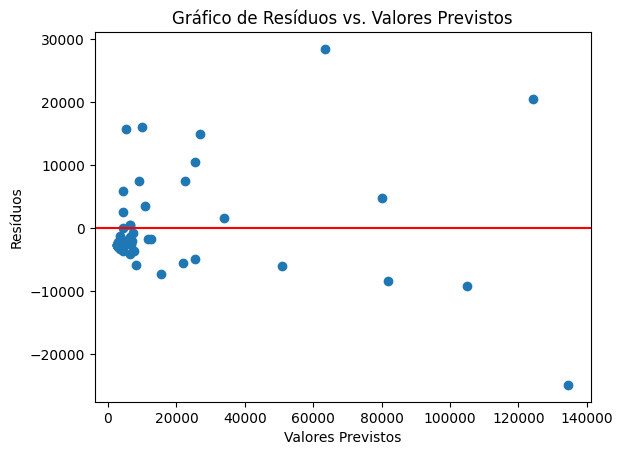

In [111]:

# Obtém os resíduos do modelo
residuos = modelo_0.resid

# Obtém os valores previstos pelo modelo
valores_previstos = modelo_0.predict(X_train[['contagem_pedidos', 'ano_compra']])

# Cria o gráfico de resíduos vs. valores previstos
plt.scatter(valores_previstos, residuos)
plt.axhline(y=0, color='r', linestyle='-')  # Adiciona uma linha horizontal em zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [127]:
# Define a variável 'proximo_ano' como uma lista contendo uma lista com o valor 2020.
# representa o ano para o qual se deseja fazer uma previsão.
ano19 = [[2019]]
ano20 = [[2020]]
ano21 = [[2021]]
ano22 = [[2022]]
ano23 = [[2023]]
ano24 = [[2024]]
ano25 = [[2025]]
ano26 = [[2026]]
ano27 = [[2027]]
ano28 = [[2028]]
ano29 = [[2029]]
ano30 = [[2030]]

# Define a variável 'contagem_pedidos_value' como o valor 5000.
# Isso provavelmente representa a quantidade de pedidos para a qual se deseja fazer uma previsão.
contagem_pedidos_value = 8000


In [129]:
# Cria um DataFrame chamado 'y_prep' com as colunas 'contagem_pedidos' e 'ano_compra',
# usando os valores definidos em 'contagem_pedidos_value', 'ano19' e 'ano20'.
# Este DataFrame será usado para fazer previsões com o modelo.
# Cria uma lista de dicionários para representar os dados de cada ano
data = [
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano19[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano20[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano21[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano22[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano23[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano24[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano25[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano26[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano27[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano28[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano29[0][0]},
    {'contagem_pedidos': contagem_pedidos_value, 'ano_compra': ano30[0][0]}

]

# Cria o DataFrame usando a lista de dicionários
y_prep = pd.DataFrame(data)

y_prep #imprime o dataframe

,contagem_pedidos,ano_compra
0,8000,2019
1,8000,2020
2,8000,2021
3,8000,2022
4,8000,2023
5,8000,2024
6,8000,2025
7,8000,2026
8,8000,2027
9,8000,2028


In [132]:
# Faz a previsão usando o modelo 'modelo_0' e os dados de entrada em 'y_prep'.
y_pred = modelo_0.predict(y_prep)
# Converte a saída da previsão em um DataFrame do pandas.
y_pred = pd.DataFrame(y_pred, columns=['receita_prevista'])
# Exibe o DataFrame 'y_pred' com a coluna renomeada.

#deixa só duas casas decimais
y_pred['receita_prevista'] = y_pred['receita_prevista'].round(2)  # Added this line


# Adiciona a coluna 'ano_compra' ao DataFrame 'y_pred',
# copiando os valores da coluna 'ano_compra' do DataFrame 'y_prep'.
y_pred['ano_compra'] = y_prep['ano_compra']

y_pred

,receita_prevista,ano_compra
0,880708.89,2019
1,880710.19,2020
2,880711.49,2021
3,880712.80,2022
4,880714.10,2023
5,880715.40,2024
6,880716.70,2025
7,880718.00,2026
8,880719.30,2027
9,880720.60,2028


In [167]:
previsão_oficial.to_csv('previsao_oficial_receita.csv')


# Análise de estoque

In [68]:
estoque_vendas_df = merged_df.groupby('product_id').agg(
    total_vendido=('order_item_id', 'sum'),  # Total de unidades vendidas
    receita_total=('price', 'sum'),  # Receita total do produto
    media_vendas_mensal=('order_item_id', 'mean'),  # Média de vendas mensais
    order_purchase_timestamp=('order_purchase_timestamp', 'first')
).reset_index()

estoque_vendas_df

,product_id,total_vendido,receita_total,media_vendas_mensal,order_purchase_timestamp
0,000b8f95fcb9e0096488278317764d19,1,58.90,1.000000,2018-08-01 22:00:33
1,001b237c0e9bb435f2e54071129237e9,1,78.90,1.000000,2018-08-09 01:24:57
2,003128f981470c3e5a2e7445e4a771cd,1,99.98,1.000000,2018-08-26 22:19:40
3,004636c889c7c3dad6631f136b7fa082,1,49.00,1.000000,2018-08-16 17:43:21
4,005030ef108f58b46b78116f754d8d38,2,32.98,1.000000,2018-08-03 13:23:00
...,...,...,...,...,...
6012,ffc9caf33e2d1e9f44e3e06da19085f7,7,1471.56,1.000000,2018-05-26 16:26:53
6013,ffd2365fb8224dc66883df9351d65deb,2,1886.90,1.000000,2018-05-17 16:45:54
6014,ffe013e1b4603e3b0b02fbb159d5b400,2,338.00,1.000000,2018-04-16 17:43:23
6015,ffedbd68fa6f44e788ff6c2db8094715,4,160.00,1.000000,2018-07-17 22:00:48


In [69]:
# Convert 'order_purchase_timestamp' to datetime
estoque_vendas_df['order_purchase_timestamp'] = pd.to_datetime(estoque_vendas_df['order_purchase_timestamp'])

# Now you can access the month and year
estoque_vendas_df['mes_compra'] = estoque_vendas_df['order_purchase_timestamp'].dt.month
estoque_vendas_df['ano_compra'] = estoque_vendas_df['order_purchase_timestamp'].dt.year
# Assume um estoque inicial de 100 unidades para cada produto
estoque_vendas_df['estoque_inicial'] = 100

# Calcula o estoque atual subtraindo o total vendido do estoque inicial
estoque_vendas_df['estoque_atual'] = estoque_vendas_df['estoque_inicial'] - estoque_vendas_df['total_vendido']
estoque_vendas_df['product_category_name'] = vendas_por_categoria['product_category_name_encoded']
estoque_vendas_df

,product_id,total_vendido,receita_total,media_vendas_mensal,order_purchase_timestamp,mes_compra,ano_compra,estoque_inicial,estoque_atual,product_category_name
0,000b8f95fcb9e0096488278317764d19,1,58.90,1.000000,2018-08-01 22:00:33,8,2018,100,99,0.0
1,001b237c0e9bb435f2e54071129237e9,1,78.90,1.000000,2018-08-09 01:24:57,8,2018,100,99,1.0
2,003128f981470c3e5a2e7445e4a771cd,1,99.98,1.000000,2018-08-26 22:19:40,8,2018,100,99,2.0
3,004636c889c7c3dad6631f136b7fa082,1,49.00,1.000000,2018-08-16 17:43:21,8,2018,100,99,3.0
4,005030ef108f58b46b78116f754d8d38,2,32.98,1.000000,2018-08-03 13:23:00,8,2018,100,98,3.0
...,...,...,...,...,...,...,...,...,...,...
6012,ffc9caf33e2d1e9f44e3e06da19085f7,7,1471.56,1.000000,2018-05-26 16:26:53,5,2018,100,93,NaN
6013,ffd2365fb8224dc66883df9351d65deb,2,1886.90,1.000000,2018-05-17 16:45:54,5,2018,100,98,NaN
6014,ffe013e1b4603e3b0b02fbb159d5b400,2,338.00,1.000000,2018-04-16 17:43:23,4,2018,100,98,NaN
6015,ffedbd68fa6f44e788ff6c2db8094715,4,160.00,1.000000,2018-07-17 22:00:48,7,2018,100,96,NaN


In [70]:
# Merge 'estoque_vendas_df' with the relevant columns of 'merged_df' instead of just 'order_status'

estoque_vendas_df = pd.merge(estoque_vendas_df, merged_df[['product_id', 'order_status']], on='product_id', how='left')
# Check if the 'order_status' column exists before proceeding
if 'order_status' in estoque_vendas_df.columns:
    estoque_vendas_df['oder_status_encoded'] = le.fit_transform(estoque_vendas_df['order_status'])
else:
    print("Column 'order_status' not found after merge. Please check the 'merged_df' DataFrame.")

#estoque_vendas_df.drop(columns='order_status', inplace=True)
#estoque_vendas_df.drop(columns='product_category_name_x', inplace=True)

estoque_vendas_df


,product_id,total_vendido,receita_total,media_vendas_mensal,order_purchase_timestamp,mes_compra,ano_compra,estoque_inicial,estoque_atual,product_category_name,order_status,oder_status_encoded
0,000b8f95fcb9e0096488278317764d19,1,58.90,1.000000,2018-08-01 22:00:33,8,2018,100,99,0.0,delivered,0
1,001b237c0e9bb435f2e54071129237e9,1,78.90,1.000000,2018-08-09 01:24:57,8,2018,100,99,1.0,delivered,0
2,003128f981470c3e5a2e7445e4a771cd,1,99.98,1.000000,2018-08-26 22:19:40,8,2018,100,99,2.0,delivered,0
3,004636c889c7c3dad6631f136b7fa082,1,49.00,1.000000,2018-08-16 17:43:21,8,2018,100,99,3.0,delivered,0
4,005030ef108f58b46b78116f754d8d38,2,32.98,1.000000,2018-08-03 13:23:00,8,2018,100,98,3.0,delivered,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11581,ffedbd68fa6f44e788ff6c2db8094715,4,160.00,1.000000,2018-07-17 22:00:48,7,2018,100,96,NaN,delivered,0
11582,ffedbd68fa6f44e788ff6c2db8094715,4,160.00,1.000000,2018-07-17 22:00:48,7,2018,100,96,NaN,delivered,0
11583,ffef256879dbadcab7e77950f4f4a195,4,95.34,1.333333,2018-07-21 12:50:11,7,2018,100,96,NaN,delivered,0
11584,ffef256879dbadcab7e77950f4f4a195,4,95.34,1.333333,2018-07-21 12:50:11,7,2018,100,96,NaN,delivered,0


In [71]:
df_correlacao = estoque_vendas_df.select_dtypes(include=np.number)

# Calcula a matriz de correlação entre as colunas do DataFrame 'df' e a armazena na variável 'corre'.
corr = df_correlacao.corr()

# Seleciona a coluna 'receita' da matriz de correlação 'corre' para visualizar a correlação entre a receita e as outras variáveis numéricas.
corr['estoque_atual']

,estoque_atual
total_vendido,-1.000000
receita_total,-0.720670
media_vendas_mensal,-0.293537
mes_compra,0.107733
ano_compra,-0.013745
estoque_inicial,NaN
estoque_atual,1.000000
product_category_name,-0.292693
oder_status_encoded,NaN


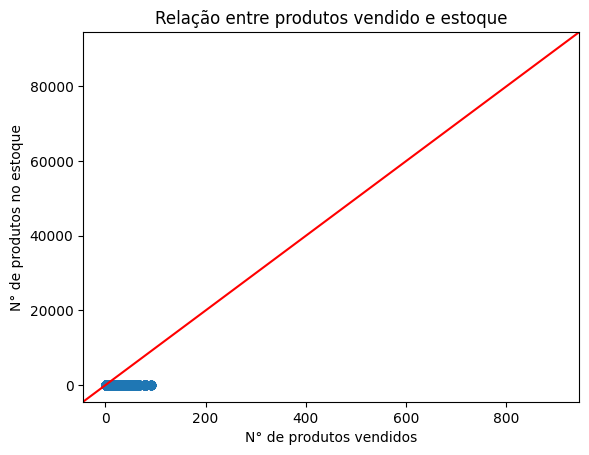

In [72]:
# Cria um gráfico de dispersão (scatter plot) com 'total_vendido' no eixo x e 'estoque_atual' no eixo y.
plt.scatter(estoque_vendas_df['total_vendido'], estoque_vendas_df['estoque_atual'])
# Adiciona uma linha reta ao gráfico, com pontos inicial (1, 10) e final (900, 90000), na cor vermelha.
plt.axline(xy1 = (1, 10),xy2 = (900, 90000), color = "red" )
# Define o título do gráfico
plt.title("Relação entre produtos vendido e estoque")
# Define o título do gráfico
plt.xlabel("N° de produtos vendidos")
# Define o rótulo do eixo y
plt.ylabel("N° de produtos no estoque")
plt.show() #print do gráfico

In [73]:
y = estoque_vendas_df['estoque_atual']
X = estoque_vendas_df[['total_vendido', 'receita_total', 'media_vendas_mensal', 'ano_compra', 'product_category_name']]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
X_train = sm.add_constant(X_train)

In [76]:
X_train

,const,total_vendido,receita_total,media_vendas_mensal,ano_compra,product_category_name
2030,1.0,7,180.00,1.750000,2018,NaN
4475,1.0,6,288.00,2.000000,2018,NaN
7399,1.0,1,67.00,1.000000,2018,NaN
9340,1.0,2,229.80,1.000000,2018,NaN
9994,1.0,12,359.84,1.000000,2018,NaN
...,...,...,...,...,...,...
11284,1.0,2,55.78,1.000000,2018,NaN
5191,1.0,37,1065.90,1.947368,2018,NaN
5390,1.0,3,198.00,1.000000,2018,NaN
860,1.0,3,119.80,1.500000,2018,NaN


In [77]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9268, 6) (2318, 5) (9268,) (2318,)


In [78]:
modelo_10 = sm.OLS(y_train,X_train [['receita_total', 'ano_compra']] ).fit()
print(modelo_10.summary())

                                 OLS Regression Results                                
Dep. Variable:          estoque_atual   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.760e+05
Date:                Sun, 11 May 2025   Prob (F-statistic):                        0.00
Time:                        22:17:43   Log-Likelihood:                         -34688.
No. Observations:                9268   AIC:                                  6.938e+04
Df Residuals:                    9266   BIC:                                  6.939e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [79]:
modelo_11 = sm.OLS(y_train,X_train [['total_vendido' , 'receita_total', 'ano_compra']] ).fit()
print(modelo_11.summary())

                                 OLS Regression Results                                
Dep. Variable:          estoque_atual   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.250e+13
Date:                Sun, 11 May 2025   Prob (F-statistic):                        0.00
Time:                        22:17:43   Log-Likelihood:                          47394.
No. Observations:                9268   AIC:                                 -9.478e+04
Df Residuals:                    9265   BIC:                                 -9.476e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [80]:
modelo_12 = sm.OLS(y_train,X_train [['total_vendido', 'media_vendas_mensal', 'ano_compra']] ).fit()
print(modelo_12.summary())

                                 OLS Regression Results                                
Dep. Variable:          estoque_atual   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.250e+13
Date:                Sun, 11 May 2025   Prob (F-statistic):                        0.00
Time:                        22:17:43   Log-Likelihood:                          47394.
No. Observations:                9268   AIC:                                 -9.478e+04
Df Residuals:                    9265   BIC:                                 -9.476e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [81]:
modelo_13 = sm.OLS(y_train,X_train [['total_vendido' , 'ano_compra']]).fit()
print(modelo_13.summary())

                                 OLS Regression Results                                
Dep. Variable:          estoque_atual   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.876e+13
Date:                Sun, 11 May 2025   Prob (F-statistic):                        0.00
Time:                        22:17:43   Log-Likelihood:                          47394.
No. Observations:                9268   AIC:                                 -9.478e+04
Df Residuals:                    9266   BIC:                                 -9.477e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [82]:
import numpy as np

# Supondo que 'y' é a sua variável dependente:
desvio_padrao = np.std(y)

print(f"Desvio padrão da variável dependente: {desvio_padrao}")

Desvio padrão da variável dependente: 14.383151221809024


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcula as métricas para o modelo_12
# Remove the 'squared' argument and calculate RMSE manually if necessary
mse = mean_squared_error(y_test, modelo_10.predict(X_test[['receita_total', 'ano_compra']]))
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
mae = mean_absolute_error(y_test, modelo_10.predict(X_test[['receita_total', 'ano_compra']]))

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 8.934402261465838
MAE: 5.030859047201363


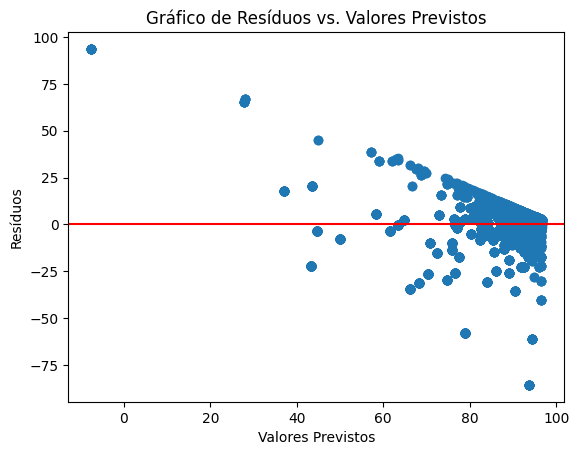

In [84]:

# Obtém os resíduos do modelo
residuos = modelo_10.resid

# Obtém os valores previstos pelo modelo
valores_previstos = modelo_10.predict(X_train[[ 'receita_total', 'ano_compra']])

# Cria o gráfico de resíduos vs. valores previstos
plt.scatter(valores_previstos, residuos)
plt.axhline(y=0, color='r', linestyle='-')  # Adiciona uma linha horizontal em zero
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.show()

In [147]:
receita_1 = 880708.89
receita_2 = 880710.19
receita_3 = 880711.49
receita_4 = 880712.80
receita_5 = 880714.10
receita_6 = 880715.40
receita_7 = 880716.70
receita_8 = 880718.00
receita_9 = 880719.30
receita_10 = 880720.60
receita_11 = 880721.90
receita_12 = 880723.20


ano_19 = [[2019]]
ano_20 = [[2020]]
ano_21 = [[2021]]
ano_22 = [[2022]]
ano_23 = [[2023]]
ano_24 = [[2024]]
ano_25 = [[2025]]
ano_26 = [[2026]]
ano_27 = [[2027]]
ano_28 = [[2028]]
ano_29 = [[2029]]
ano_30 = [[2030]]

In [150]:
# Cria um DataFrame chamado 'predição' com as colunas 'contagem_pedidos' e 'ano_compra',
# usando os valores definidos em 'contagem_pedidos_value' e 'proximo_ano'.
# Este DataFrame será usado para fazer previsões com o modelo.
conjuntos_dados = [
    {'receita_total': receita_1, 'ano_previsto': ano_19[0][0]},
    {'receita_total': receita_2, 'ano_previsto': ano_20[0][0]},
    {'receita_total': receita_3, 'ano_previsto': ano_21[0][0]},
    {'receita_total': receita_4, 'ano_previsto': ano_22[0][0]},
    {'receita_total': receita_5, 'ano_previsto': ano_23[0][0]},
    {'receita_total': receita_6, 'ano_previsto': ano_24[0][0]},
    {'receita_total': receita_7, 'ano_previsto': ano_25[0][0]},
    {'receita_total': receita_8, 'ano_previsto': ano_26[0][0]},
    {'receita_total': receita_9, 'ano_previsto': ano_27[0][0]},
    {'receita_total': receita_10, 'ano_previsto': ano_28[0][0]},
    {'receita_total': receita_11, 'ano_previsto': ano_29[0][0]},
    {'receita_total': receita_12, 'ano_previsto': ano_30[0][0]}
]


previsão = pd.DataFrame(conjuntos_dados)


previsão #print dataframe

,receita_total,ano_previsto
0,880708.89,2019
1,880710.19,2020
2,880711.49,2021
3,880712.80,2022
4,880714.10,2023
5,880715.40,2024
6,880716.70,2025
7,880718.00,2026
8,880719.30,2027
9,880720.60,2028


In [164]:
# Faz a previsão usando o modelo 'modelo_0' e os dados de entrada em 'y_prep'.
previsão = modelo_10.predict(previsão)
# Converte a saída da previsão em um DataFrame do pandas.
previsão = pd.DataFrame(previsão, columns=['Estoque para o ano previsto'])
# Exibe o DataFrame 'y_pred' com a coluna renomeada.
previsão

ValueError: shapes (12,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [160]:
previsão = abs(previsão)+100
previsão

,Estoque para o ano previsto
0,6374.897878
1,6374.859368
2,6374.820858
3,6374.782421
4,6374.743911
5,6374.705401
6,6374.666891
7,6374.628381
8,6374.589870
9,6374.551360
